In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# 1. Cargar datos
with open(os.path.join("..", "data_sintetica", "mantenimiento_sintetico.pkl"), "rb") as f:
    data = pickle.load(f)

print("Datos Cargados")
data

Datos Cargados


,fecha,tecnico,tipo_mantenimiento,equipo,horas_trabajadas,tiempo_parada,costo_usd
0,2024-11-23,Tecnico_7,Preventivo,Perforadora,3,17,704
1,2024-02-27,Tecnico_4,Critico,Correa,2,44,1081
2,2024-01-13,Tecnico_8,Correctivo,Perforadora,2,34,6175
3,2024-05-20,Tecnico_5,Critico,Correa,10,29,9532
4,2024-05-05,Tecnico_7,Preventivo,Planta,2,23,5847
...,...,...,...,...,...,...,...
495,2024-12-13,Tecnico_1,Preventivo,Chancadora,5,15,4307
496,2024-10-01,Tecnico_7,Preventivo,Molino,11,15,7651
497,2024-06-18,Tecnico_7,Critico,Molino,2,30,9993
498,2024-01-15,Tecnico_9,Preventivo,Planta,11,41,3736


In [7]:
# 2. Seleccionar variables numéricas para clusterización

variables_numericas = ["horas_trabajadas", "tiempo_parada", "costo_usd"]

X = data[variables_numericas]

In [8]:
#3. Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#4. Definir y entrenar el modelo 
kmeans = KMeans(n_clusters=3,random_state=42)
data["cluster"] = kmeans.fit_predict(X_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

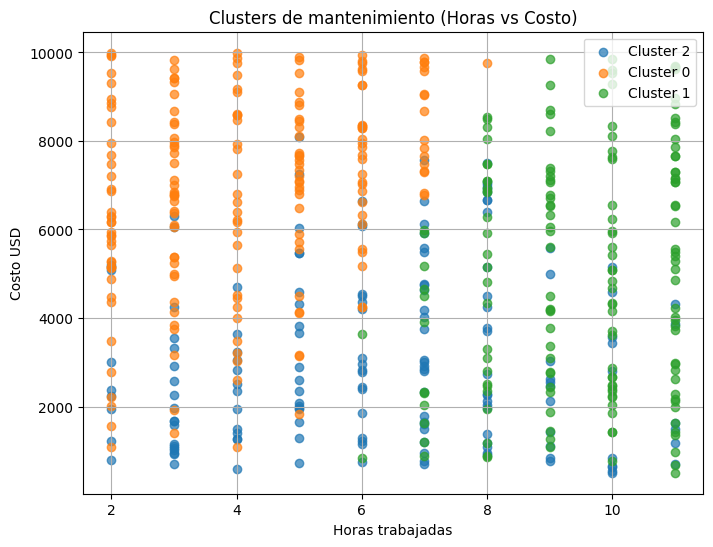

In [10]:
#5. Gráfica
plt.figure(figsize=(8,6))
for cluster in data ["cluster"].unique():
    subset = data[data["cluster"]==cluster]
    plt.scatter(subset["horas_trabajadas"], subset["costo_usd"], label=f"Cluster {cluster}", alpha=0.7)

plt.title("Clusters de mantenimiento (Horas vs Costo)")
plt.xlabel("Horas trabajadas")
plt.ylabel("Costo USD")
plt.legend()
plt.grid(True)
plt.show

In [11]:
#6. Resumen
print("\nCantidad de registros por cluster:")
print(data["cluster"].value_counts())


Cantidad de registros por cluster:
cluster
0    185
1    159
2    156
Name: count, dtype: int64
